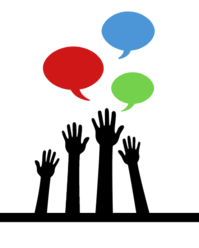




*  The Sparks foundation
*   Data Science and Business Analytics


*  Task #1
*  Prediction using Supervised ML




**Importing Necessary Libraries**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Reading File**

In [62]:
df=pd.read_csv("/content/student_scores - student_scores.csv")

In [63]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Basic Information about data**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Cheking Null values**

In [65]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

This dataset doesn't have any Null values

**scatter plot**

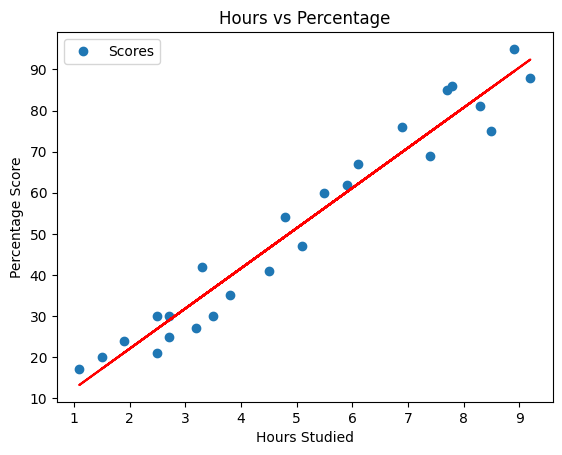

In [66]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

m, b = np.polyfit(df['Hours'], df['Scores'], 1)
plt.plot(df['Hours'], m * df['Hours'] + b, color='red')

plt.show()



* Created a scatter plot with linear line to see the distribution of the data
*  polyfit() is used to calculate the coefficients of the linear regression line. It fits a polynomial of degree 1



**Spliting data into train and test**

In [67]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [68]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [69]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [71]:
from sklearn.linear_model import LinearRegression  

**Model Building**

In [72]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

As this data is linearly separable built an Linear Regression model

In [73]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [74]:
from sklearn.metrics import r2_score,mean_squared_error

In [75]:
def model_performance(y_actual,y_pred):
  r2=r2_score(y_actual,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_actual,y_pred))
  print("R2 score:{}|RMSE: {}".format(round(r2,2),round(RMSE,2)))

In [76]:
print("Train Performance")
model_performance(y_train,y_pred_train)
print("Test Performance")
model_performance(y_test,y_pred_test)

Train Performance
R2 score:0.97|RMSE: 4.55
Test Performance
R2 score:0.89|RMSE: 7.49


Performance of train and test data

**Predicitions**

In [77]:
print(X_test) 
y_pred = model.predict(X_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]
 [7.4]]


In [78]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316
